<a href="https://colab.research.google.com/github/itumor/colab/blob/master/Algorithmic_Trading_Strategy_Using_MACD_%26_Python_F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
stock ='AMZN'
startdate = '2020-09-01'
enddate = datetime.today().strftime('%Y-%m-%d')

In [3]:
df = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-01,3513.870117,3467.000000,3489.580078,3499.120117,3476400,3499.120117
2020-09-02,3552.250000,3486.689941,3547.000000,3531.449951,3931500,3531.449951
2020-09-03,3488.409912,3303.000000,3485.000000,3368.000000,8161100,3368.000000
2020-09-04,3381.500000,3111.129883,3318.000000,3294.620117,8781800,3294.620117
2020-09-08,3250.850098,3130.000000,3144.000000,3149.840088,6094200,3149.840088
2020-09-09,3303.179932,3185.000000,3202.989990,3268.610107,5188700,3268.610107
2020-09-10,3349.889893,3170.550049,3307.219971,3175.110107,5330700,3175.110107
2020-09-11,3217.340088,3083.979980,3208.689941,3116.219971,5094000,3116.219971
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600,3102.969971


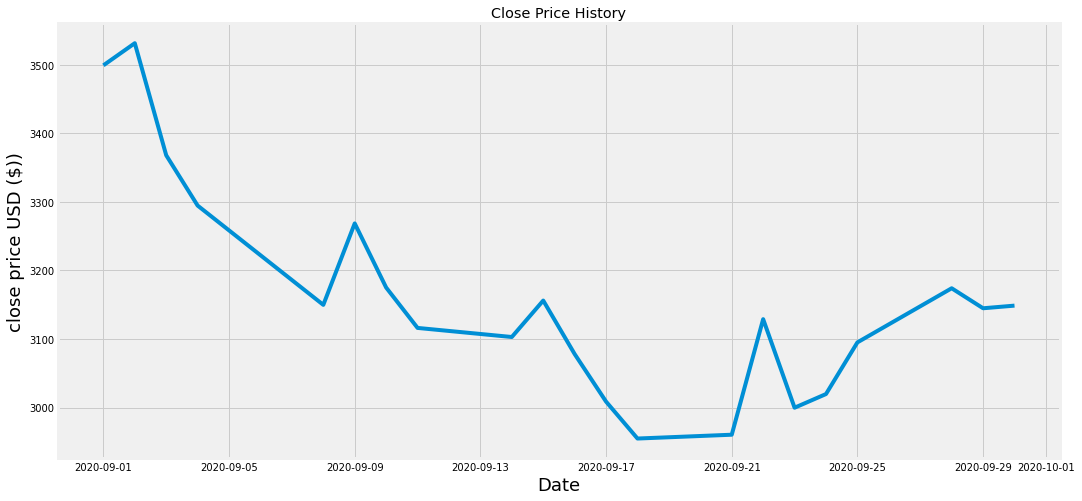

In [4]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($))', fontsize=18)
plt.show()

In [5]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

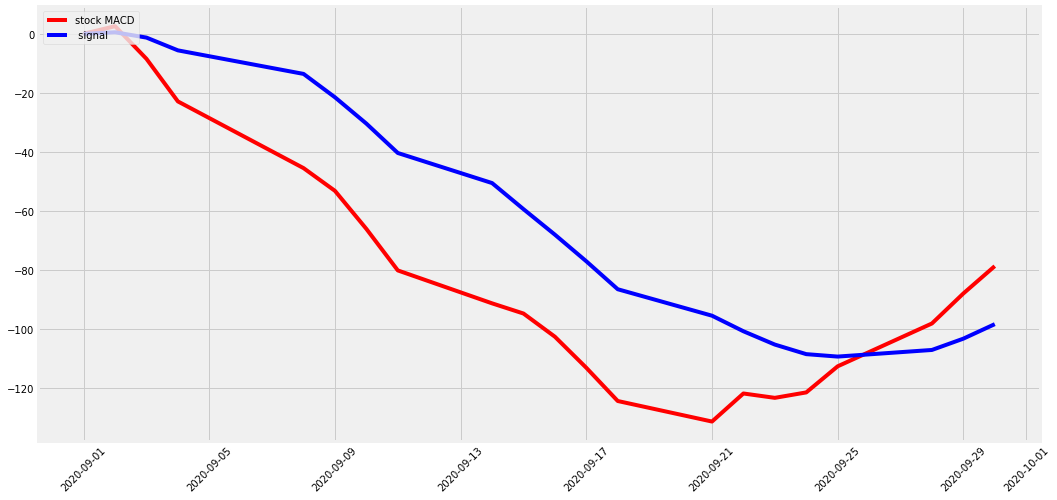

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df.index, MACD, label = 'stock MACD', color='red')
plt.plot(df.index, signal, label = ' signal', color='blue' )
plt.xticks(rotation = 45 )
plt.legend(loc='upper left')
plt.show()

In [7]:
df['MACD']  = MACD
df['signal'] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,signal
Date,,,,,,,,
2020-09-01,3513.870117,3467.000000,3489.580078,3499.120117,3476400,3499.120117,0.000000,0.000000
2020-09-02,3552.250000,3486.689941,3547.000000,3531.449951,3931500,3531.449951,2.579018,0.515804
2020-09-03,3488.409912,3303.000000,3485.000000,3368.000000,8161100,3368.000000,-8.468517,-1.281060
2020-09-04,3381.500000,3111.129883,3318.000000,3294.620117,8781800,3294.620117,-22.881151,-5.601079
2020-09-08,3250.850098,3130.000000,3144.000000,3149.840088,6094200,3149.840088,-45.461752,-13.573213
2020-09-09,3303.179932,3185.000000,3202.989990,3268.610107,5188700,3268.610107,-53.160491,-21.490669
2020-09-10,3349.889893,3170.550049,3307.219971,3175.110107,5330700,3175.110107,-66.045139,-30.401563
2020-09-11,3217.340088,3083.979980,3208.689941,3116.219971,5094000,3116.219971,-80.085086,-40.338267
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600,3102.969971,-91.229374,-50.516489


In [8]:
def buy_sell(signal):
   Buy = []
   Sell = []
   flag = -1

   for i in range(0, len(signal)):
     if signal['MACD'][i] > signal['signal'][i]:
       Sell.append(np.nan)
       if flag != 1:
         Buy.append(signal['Close'][i])
         flag = 1
       else:
           Buy.append(np.nan)
     elif signal['MACD'][i] < signal['signal'][i]:
       Buy.append(np.nan)
       if flag != 0:
         Sell.append(signal['Close'][i])
         flag = 0 
       else:
           Sell.append(np.nan)
     else:
       Buy.append(np.nan)
       Sell.append(np.nan)

   return (Buy, Sell)


In [9]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_signal_Price'] = a[1]

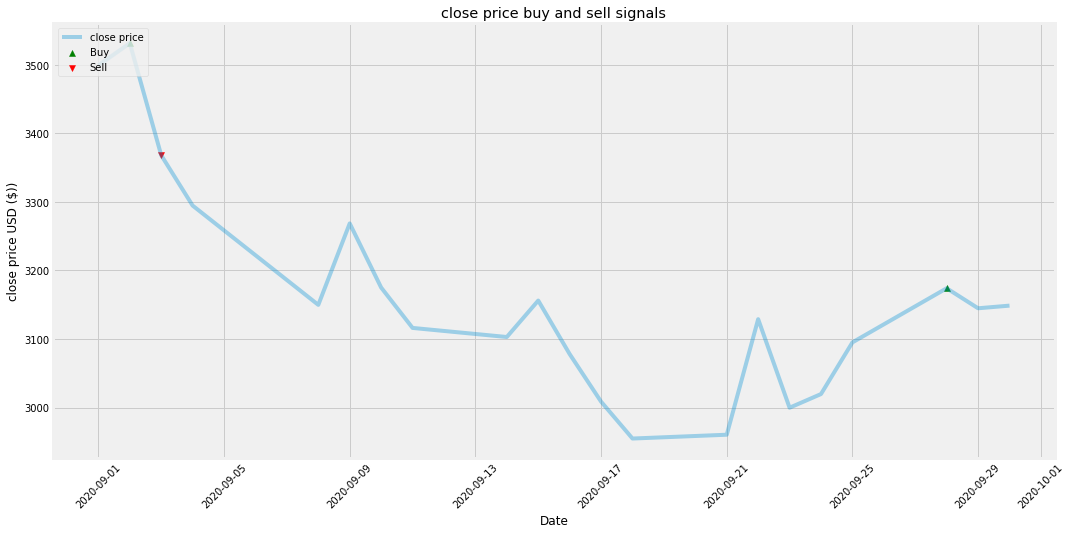

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1 )
plt.scatter(df.index, df['Sell_signal_Price'], color='red', label='Sell', marker='v' , alpha = 1 )
plt.plot(df['Close'],label='close price', alpha = 0.35)
plt.title('close price buy and sell signals')
plt.xlabel('Date')
plt.ylabel('close price USD ($))')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45 )
plt.show()